In [ ]:
import nltk
import string
import seaborn as sns
import pandas as pd

In [ ]:
# nltk.download()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/dataset.csv'

Mounted at /content/drive


In [ ]:
#Reading the dataset

spam_text = pd.read_csv(file_path, header=0, names = ['label', 'text'])
spam_text.head(5)

,label,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [ ]:
spam_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   20348 non-null  object
 1   text    20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB


In [ ]:
spam_text.describe()

,label,text
count,20348,20348
unique,2,20334
top,ham,SPAM ALERT 🚔 User: Username: @DillyBubbl...
freq,14337,8


In [ ]:
spam_text.groupby(['label']).size()

label
ham     14337
spam     6011
dtype: int64

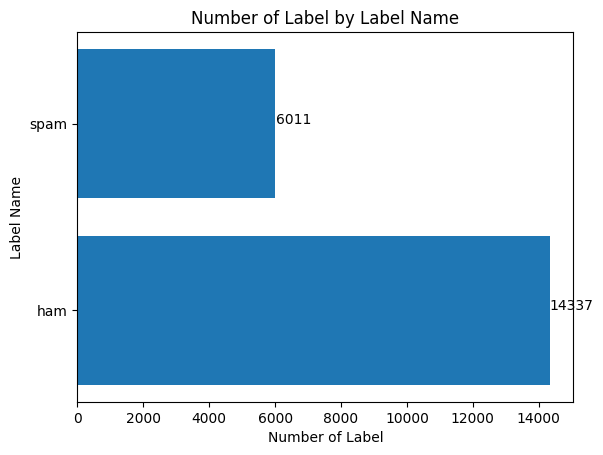

In [ ]:
import matplotlib.pyplot as plt

spam_text_label = spam_text['label'].value_counts()

plt.barh(spam_text_label.index, spam_text_label)
plt.ylabel("Label Name")
plt.xlabel("Number of Label")
plt.title("Number of Label by Label Name");

for i, v in enumerate(spam_text_label):
    plt.text(v + 3, i, str(v))

plt.show()

## EDA

In [ ]:
spam_text["length"] = spam_text['text'].str.len()
pd.reset_option('display.max_colwidth')
spam_text.head()

,label,text,length
0,spam,naturally irresistible your corporate identity...,769
1,spam,the stock trading gunslinger fanny is merrill ...,585
2,spam,unbelievable new homes made easy im wanting to...,416
3,spam,4 color printing special request additional in...,436
4,spam,do not have money get software cds from here s...,199


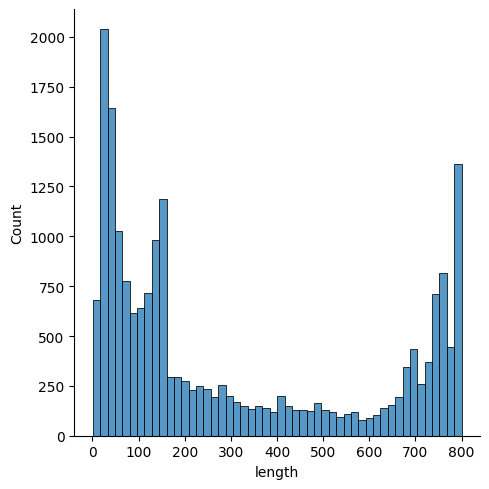

In [ ]:
sns.displot(spam_text["length"], bins=50)

In [ ]:
spam_text.sort_values(by='length').iloc[-1]['text']

'use perl daily newsletter in this issue damian conway publishes exegesis 1635465 1635465nd open source cms conference damian conway publishes exegesis 1635465 posted by hfb on friday august 1635465 1635465 1635465 perl1635465 url an anonymous coward writes 1635465 has a 1635465 link to 1635465 damian s 1635465 exegesis 1635465 discuss this story at url links 1635465 url 1635465 url 1635465 url 1635465 url 1635465nd open source cms conference posted by ziggy on friday august 1635465 1635465 1635465 events url 1635465 gregor j rothfuss writes there will be a second 1635465 open source cms conference this fall in berkeley we will feature presentations and workshops from a wide range of cms and would definitely welcome some perl fu in there as well also of interest our efforts to 1635465 build'

In [ ]:
spam_text.sort_values(by='length').iloc[0]['text']

'👍'

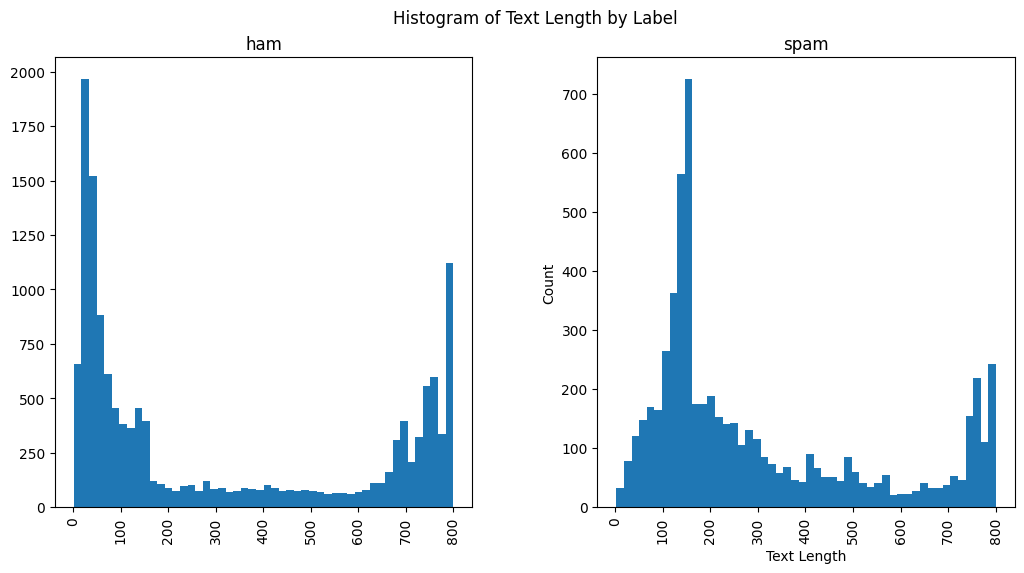

In [ ]:
spam_text.hist(column='length',by='label',bins=50,figsize=(12,6))
plt.suptitle('Histogram of Text Length by Label')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

## Text preprocessing

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import re
from nltk.corpus import stopwords

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    text_without_emoji = emoji_pattern.sub(r'', text)
    return text_without_emoji

def text_processing_emoji(text):
    # Remove emojis
    text = remove_emojis(text)

    # Remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower()

    tokens = []
    for word in text.split():
        if word not in stopwords.words('english'):
            tokens.append(word)

    return tokens

def text_processing(text):
    tokens = []
    #remove punctuations
    translator = str.maketrans('','',string.punctuation)
    text = text.translate(translator)
    text = text.lower()
    for word in text.split():
      if word not in stopwords.words('english'):
        tokens.append(word)

    return tokens


print(text_processing("This sample text contains laughing emojis 😀 😃 😄 😁 😆 😅 😂 🤣"))

['sample', 'text', 'contains', 'laughing', 'emojis', '😀', '😃', '😄', '😁', '😆', '😅', '😂', '🤣']


In [ ]:
#spam_text['word_emoji'] = spam_text['text'].apply(text_processing)

In [ ]:
spam_text['word'] = spam_text['text'].apply(text_processing_emoji)

In [ ]:
spam_text.head()

,label,text,length,word
0,spam,naturally irresistible your corporate identity...,769,"[naturally, irresistible, corporate, identity,..."
1,spam,the stock trading gunslinger fanny is merrill ...,585,"[stock, trading, gunslinger, fanny, merrill, m..."
2,spam,unbelievable new homes made easy im wanting to...,416,"[unbelievable, new, homes, made, easy, im, wan..."
3,spam,4 color printing special request additional in...,436,"[4, color, printing, special, request, additio..."
4,spam,do not have money get software cds from here s...,199,"[money, get, software, cds, software, compatib..."


## Word Cloud

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
spam_column = spam_text[spam_text['label'] == 'spam']
text = ' '.join(spam_column['word'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
ham_column = spam_text[spam_text['label'] == 'ham']
text = ' '.join(ham_column['word'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.pipeline import Pipeline

## Split data set to train & test with 20%

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train, x_test, y_train, y_test = train_test_split(spam_text['text'],spam_text['label'], test_size=0.2, random_state=42)

# Model Building

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

NB = MultinomialNB()
SVM = SVC(kernel='rbf')
lr = LogisticRegression()

bow_vectorizer = CountVectorizer(analyzer=text_processing_emoji)
tf_vectorizer = TfidfVectorizer(analyzer=text_processing_emoji)

In [ ]:
def vectorizer(vectorizer, ngram = 1):
  if vectorizer == 'bow':
      vectorizer = CountVectorizer(ngram_range= (1, ngram))
  elif vectorizer == 'tf':
      vectorizer = TfidfVectorizer(ngram_range= (1, ngram))
  else:
        raise ValueError("Invalid type")

  x_train_counts = vectorizer.fit_transform(x_train)
  x_test_counts = vectorizer.transform(x_test)

  return x_train_counts, x_test_counts

#showing the results
def results(y_test, y_pred):
  print("Accuracy: ", accuracy_score(y_test, y_pred))

  precision = precision_score(y_test, y_pred, pos_label='spam')
  print("Precision: ", precision)

  recall = recall_score(y_test, y_pred, pos_label='spam')
  print("Recall: ", recall)

  f1 = f1_score(y_test, y_pred, pos_label='spam')
  print("F1 Score: ", f1)

def model_run(classifier, train_counts, test_counts):
  # Train classifier
  classifier.fit(train_counts, y_train)

  # Make predictions on the test data
  y_pred = classifier.predict(test_counts)

  results(y_test, y_pred)

In [ ]:
def vectorizer(vectorizer, ngram = 1, stop_words = False):
  if stop_words == False:
    if vectorizer == 'bow':
        vectorizer = CountVectorizer(ngram_range = (1, ngram))
    elif vectorizer == 'tf':
        vectorizer = TfidfVectorizer(ngram_range= (1, ngram))
    else:
          raise ValueError("Invalid type")

  #if removing stopwords
  else:
    if vectorizer == 'bow':
        vectorizer = CountVectorizer(ngram_range = (1, ngram), stop_words = "english")
    elif vectorizer == 'tf':
        vectorizer = TfidfVectorizer(ngram_range= (1, ngram))
    else:
          raise ValueError("Invalid type")

  x_train_counts = vectorizer.fit_transform(x_train)
  x_test_counts = vectorizer.transform(x_test)

  return x_train_counts, x_test_counts

## **Naive Bayes**

#### BOW

In [ ]:
#Trying different ngrams
print("Results for BOW with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow')
model_run(NB, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 2)
model_run(NB, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 3-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 3)
model_run(NB, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 4-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 4)
model_run(NB, x_train_counts, x_test_counts)

Results for BOW with 1-grams:
 
Accuracy:  0.9164619164619164
Precision:  0.8149575944487278
Recall:  0.9135695764909249
F1 Score:  0.8614506927465363
-----------------------------
Results for BOW with 2-grams:
 
Accuracy:  0.9282555282555283
Precision:  0.8643639427127211
Recall:  0.8867761452031115
F1 Score:  0.8754266211604095
-----------------------------
Results for BOW with 3-grams:
 
Accuracy:  0.9304668304668304
Precision:  0.8793402777777778
Recall:  0.8755401901469317
F1 Score:  0.877436119532265
-----------------------------
Results for BOW with 4-grams:
 
Accuracy:  0.9314496314496314
Precision:  0.8919642857142858
Recall:  0.8634399308556612
F1 Score:  0.8774703557312254


In [ ]:
#Trying without stopwords
print("Results for BOW with 1-grams removing stopwords:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', stop_words = True)
model_run(NB, x_train_counts, x_test_counts)

Results for BOW with 1-grams removing stopwords:
 
Accuracy:  0.9159705159705159
Precision:  0.805701425356339
Recall:  0.9282627484874676
F1 Score:  0.8626506024096384


#### tf-idf

In [ ]:
#Trying different ngrams
print("Results for tfidf with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf')
model_run(NB, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for tfidf with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf', ngram = 2)
model_run(NB, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for tfidf with 3-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf', ngram = 3)
model_run(NB, x_train_counts, x_test_counts)

Results for tfidf with 1-grams:
 
Accuracy:  0.8648648648648649
Precision:  0.9354375896700143
Recall:  0.5635263612791702
F1 Score:  0.7033441208198489
-----------------------------
Results for tfidf with 2-grams:
 
Accuracy:  0.8626535626535626
Precision:  0.9557926829268293
Recall:  0.5419187554019015
F1 Score:  0.6916712630998344
-----------------------------
Results for tfidf with 3-grams:
 
Accuracy:  0.8597051597051597
Precision:  0.969551282051282
Recall:  0.5229040622299049
F1 Score:  0.6793935991016283


### Conclusion:

#### We can see that for BOW the results increase as n-gram increases and that stopwords removal does not improve the model.
#### For TF-IDF higher n-gram does not increase the results.
#### The **best** option would be to use 3-4 gram BOW.


## **Support Vector Machine**

#### BOW

In [ ]:
#Trying different ngrams
print("Results for BOW with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow')
model_run(SVM, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 2)
model_run(SVM, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 3-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 3)
model_run(SVM, x_train_counts, x_test_counts)

Results for BOW with 1-grams:
 
Accuracy:  0.9442260442260443
Precision:  0.9659318637274549
Recall:  0.8331892826274849
F1 Score:  0.8946635730858469
-----------------------------
Results for BOW with 2-grams:
 
Accuracy:  0.9388206388206388
Precision:  0.9670781893004116
Recall:  0.8124459809853068
F1 Score:  0.8830436824800377
-----------------------------
Results for BOW with 3-grams:
 
Accuracy:  0.9316953316953317
Precision:  0.9650793650793651
Recall:  0.7882454624027658
F1 Score:  0.8677450047573739


In [ ]:
#Trying without stopwords
print("Results for BOW with 1-grams removing stopwords:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', stop_words = True)
model_run(SVM, x_train_counts, x_test_counts)

Results for BOW with 1-grams removing stopwords:
 
Accuracy:  0.9417690417690417
Precision:  0.96
Recall:  0.8297320656871219
F1 Score:  0.8901251738525731


#### TF-IDF

In [ ]:
#Trying different ngrams
print("Results for tdidf with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf')
model_run(SVM, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for tfidf with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf', ngram = 2)
model_run(SVM, x_train_counts, x_test_counts)

Results for tdidf with 1-grams:
 
Accuracy:  0.9513513513513514
Precision:  0.9419354838709677
Recall:  0.8833189282627485
F1 Score:  0.911685994647636
-----------------------------
Results for tfidf with 2-grams:
 
Accuracy:  0.9461916461916462
Precision:  0.9318600368324125
Recall:  0.874675885911841
F1 Score:  0.9023629068212216


### Conclusion:

#### We can see that for BOW the results does not increase as n-gram increases and that stopwords removal does not improve the model.
#### For TF-IDF higher n-gram does not increase and stopwords removal does not improve the model


## **Logistic Regression**

In [ ]:
#Trying different ngrams
print("Results for BOW with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow')
model_run(lr, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 2)
model_run(lr, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for BOW with 3-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('bow', ngram = 3)
model_run(lr, x_train_counts, x_test_counts)

Results for BOW with 1-grams:
 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9493857493857494
Precision:  0.9439775910364145
Recall:  0.8738115816767502
F1 Score:  0.9075403949730699
-----------------------------
Results for BOW with 2-grams:
 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9523341523341523
Precision:  0.9538171536286523
Recall:  0.874675885911841
F1 Score:  0.9125338142470695
-----------------------------
Results for BOW with 3-grams:
 
Accuracy:  0.9488943488943489
Precision:  0.9558117195004803
Recall:  0.8599827139152982
F1 Score:  0.905368516833485


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Trying different ngrams
print("Results for TF-IDF with 1-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf')
model_run(lr, x_train_counts, x_test_counts)

print("-----------------------------")
print("Results for TF-IDF with 2-grams:")
print(" ")

x_train_counts, x_test_counts = vectorizer('tf', ngram = 2)
model_run(lr, x_train_counts, x_test_counts)

Results for TF-IDF with 1-grams:
 
Accuracy:  0.9316953316953317
Precision:  0.9181731684110371
Recall:  0.8340535868625756
F1 Score:  0.8740942028985507
-----------------------------
Results for TF-IDF with 2-grams:
 
Accuracy:  0.9324324324324325
Precision:  0.9216061185468452
Recall:  0.8331892826274849
F1 Score:  0.8751702224239674


### Conclusion:

#### We can see that for BOW the results increase as n-gram increases and that stopwords removal does not improve the model.
#### For TF-IDF higher n-gram does not increase and stopwords removal does not improve the model


## **Decision Tree**

### Decision Tree with BOW (default parameter)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, log_loss, roc_curve, auc
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('Classifier', DecisionTreeClassifier())
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree with TFIDF (Default Parameter)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('Classifier', DecisionTreeClassifier())
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Using Cross Validation to find the best max_depth value for Decision Tree with BOW



In [ ]:
# Using Cross Validation to find the best max_depth value
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('classifier', DecisionTreeClassifier())
])

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'classifier__max_depth': [20, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=2)
grid_search.fit(x_train, y_train)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)

predictions = grid_search.predict(x_test)
y_pred_proba = grid_search.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

### Using Cross Validation to find the best max_depth value for Decision Tree with TFIDF





In [ ]:
# Using Cross Validation to find the best max_depth value
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('classifier', DecisionTreeClassifier())
])

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'classifier__max_depth': [20, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=2)
grid_search.fit(x_train, y_train)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)

predictions = grid_search.predict(x_test)
y_pred_proba = grid_search.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

## **Random Forest**

### Random Forest with BOW (Default Parameters)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forest with TFIDF (Default Parameters)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier())
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Using Cross Validation to find the best max_depth and n_estimators values for Random Forest with BOW

In [ ]:
#finding the best parameter RandomForest BOW


pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'classifier__max_depth': [20, 50, 100],
    'classifier__n_estimators': [50, 100, 150]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=2)
grid_search.fit(x_train, y_train)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)

predictions = grid_search.predict(x_test)
y_pred_proba = grid_search.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

### Using Cross Validation to find the best max_depth and n_estimators values for Random Forest with TFIDF

In [ ]:
#finding the best parameter RandomForest TFIDF

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier())
])

# Define the parameter grid for the RandomForestClassifier
param_grid = {
    'classifier__max_depth': [20, 50, 100],
    'classifier__n_estimators': [50, 100, 150]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=2)
grid_search.fit(x_train, y_train)

# Print the best parameters and classification report
print("Best Parameters:", grid_search.best_params_)

predictions = grid_search.predict(x_test)
y_pred_proba = grid_search.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

### Manual Hyperparameter Tuning for Random Forest

In [ ]:
# n_estimators=150 (BOW)
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier(n_estimators=150))
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

In [ ]:
# n_estimators=150 (TFIDF)
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier(n_estimators=150))
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

In [ ]:
# max_depth=100 (BOW)
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier(max_depth=100))
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

In [ ]:
# max_depth=100 (TFIDF)
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=text_processing_emoji)),
    ('classifier', RandomForestClassifier(max_depth=100))
])

pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)
y_pred_proba = pipeline.predict_proba(x_test) #predicted probability
loss = log_loss(y_test, y_pred_proba)

print(classification_report(predictions, y_test))
print('Log Loss = ', loss)

# Data Visualisation

In [ ]:
acc=[]
model=[]

In [ ]:
acc.append(accc)
model.append('Logistic Regression(bow)')

In [ ]:
plt.barh(model,acc)
plt.title('Accuracy of different models')
plt.xlabel('Accuracy')

for index, value in enumerate(acc):
    plt.text(value, index,str(value))
plt.show()